<a href="https://colab.research.google.com/github/HarisMashood/ADL_Exercises/blob/main/Exercise_2_ADL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models, Input
import matplotlib.pyplot as plt
import numpy as np

# Load and preprocess CIFAR-10 dataset
(x_train_cifar, y_train_cifar), (x_test_cifar, y_test_cifar) = tf.keras.datasets.cifar10.load_data()
x_train_cifar = x_train_cifar.astype('float32') / 255.0
x_test_cifar = x_test_cifar.astype('float32') / 255.0
y_train_cifar = tf.keras.utils.to_categorical(y_train_cifar, num_classes=10)
y_test_cifar = tf.keras.utils.to_categorical(y_test_cifar, num_classes=10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


In [2]:
# Function to create CNN
def create_cnn(activation, input_shape):
    inputs = Input(shape=input_shape)
    x = layers.Conv2D(32, (3, 3), activation=activation)(inputs)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(64, (3, 3), activation=activation)(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(64, (3, 3), activation=activation)(x)
    x = layers.Flatten()(x)
    x = layers.Dense(64, activation=activation)(x)
    outputs = layers.Dense(10, activation='softmax')(x)
    model = models.Model(inputs=inputs, outputs=outputs)
    return model

# Task 1: Tuning SGD learning rate and momentum

In [4]:
def train_and_evaluate_sgd(model, x_train, y_train, x_test, y_test, learning_rate, momentum, epochs=10):
    sgd = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=momentum)
    model.compile(optimizer=sgd,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    history = model.fit(x_train, y_train,
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        verbose=1)
    return history

def plot_sgd_comparison(histories):
    plt.figure(figsize=(15, 10))
    metrics = ['loss', 'accuracy']

    for metric in metrics:
        plt.subplot(2, 1, metrics.index(metric) + 1)
        for (lr, mom), history in histories.items():
            plt.plot(history.history[metric], label=f'LR={lr}, Momentum={mom} (Train)')
            plt.plot(history.history[f'val_{metric}'], label=f'LR={lr}, Momentum={mom} (Val)')
        plt.title(f'SGD - {metric.capitalize()} Comparison')
        plt.xlabel('Epochs')
        plt.ylabel(metric.capitalize())
        plt.legend()

    plt.tight_layout()
    plt.show()


Training with LR=0.01, Momentum=0.0
Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.1868 - loss: 2.1784 - val_accuracy: 0.3548 - val_loss: 1.8346
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.3759 - loss: 1.7461 - val_accuracy: 0.4440 - val_loss: 1.5458
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4590 - loss: 1.4968 - val_accuracy: 0.4586 - val_loss: 1.4849
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5124 - loss: 1.3673 - val_accuracy: 0.5228 - val_loss: 1.3326
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5507 - loss: 1.2703 - val_accuracy: 0.5722 - val_loss: 1.2147
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5774 - loss: 1.2020 - val_accuracy: 0.5490 - val_loss: 1.2701
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6009 - loss: 1.1362 - val_accuracy: 0.5435 - val_loss: 1.3112
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/ste

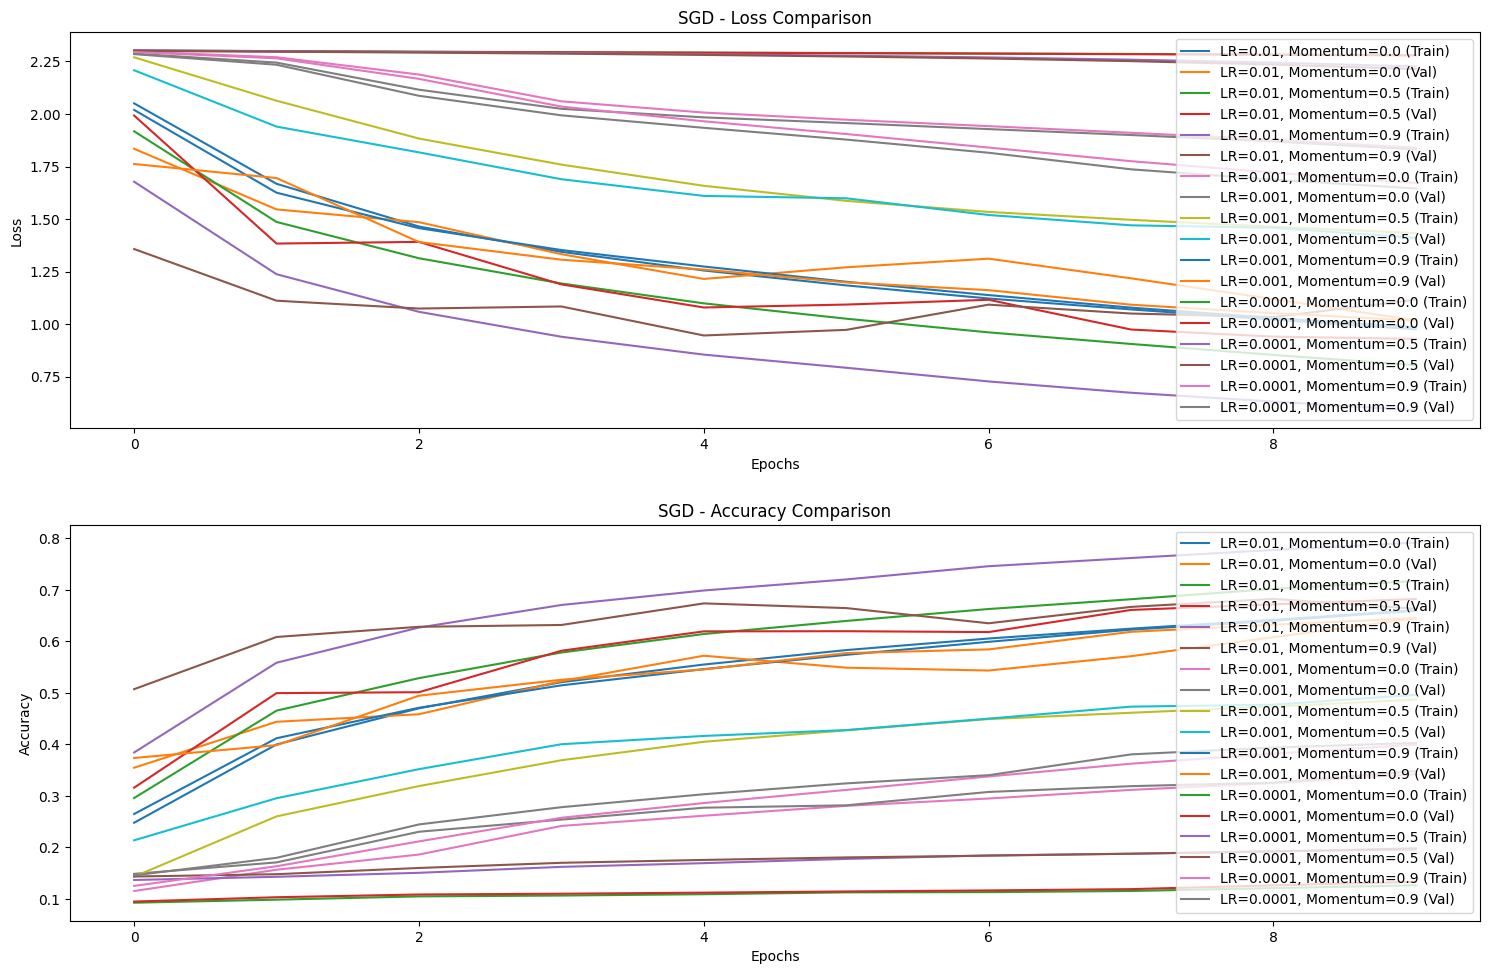

In [5]:
learning_rates = [0.01, 0.001, 0.0001]
momentums = [0.0, 0.5, 0.9]
histories_sgd = {}

for lr in learning_rates:
    for mom in momentums:
        print(f'\nTraining with LR={lr}, Momentum={mom}')
        model = create_cnn('relu', (32, 32, 3))
        history = train_and_evaluate_sgd(model, x_train_cifar, y_train_cifar, x_test_cifar, y_test_cifar, lr, mom)
        histories_sgd[(lr, mom)] = history

plot_sgd_comparison(histories_sgd)

# Task 2: Comparison of Optimizer

In [6]:
def train_and_evaluate_other_optimizers(model, x_train, y_train, x_test, y_test, optimizer, epochs=10):
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    history = model.fit(x_train, y_train,
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        verbose=1)
    return history

def plot_optimizer_comparison(histories):
    plt.figure(figsize=(15, 10))
    metrics = ['loss', 'accuracy']

    for metric in metrics:
        plt.subplot(2, 1, metrics.index(metric) + 1)
        for name, history in histories.items():
            plt.plot(history.history[metric], label=f'{name} (Train)')
            plt.plot(history.history[f'val_{metric}'], label=f'{name} (Val)')
        plt.title(f'Optimizer - {metric.capitalize()} Comparison')
        plt.xlabel('Epochs')
        plt.ylabel(metric.capitalize())
        plt.legend()

    plt.tight_layout()
    plt.show()


Training with SGD optimizer
Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.1335 - loss: 2.2877 - val_accuracy: 0.1728 - val_loss: 2.1838
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.2212 - loss: 2.1087 - val_accuracy: 0.2886 - val_loss: 1.9576
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3081 - loss: 1.9195 - val_accuracy: 0.3357 - val_loss: 1.8452
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.3498 - loss: 1.8075 - val_accuracy: 0.3811 - val_loss: 1.7217
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3826 - loss: 1.7201 - val_accuracy: 0.4001 - val_loss: 1.6596
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4128 - loss: 1.6358 - val_accuracy: 0.4279 - val_loss: 1.5833
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4330 - loss: 1.5710 - val_accuracy: 0.4441 - val_loss: 1.5312
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accur

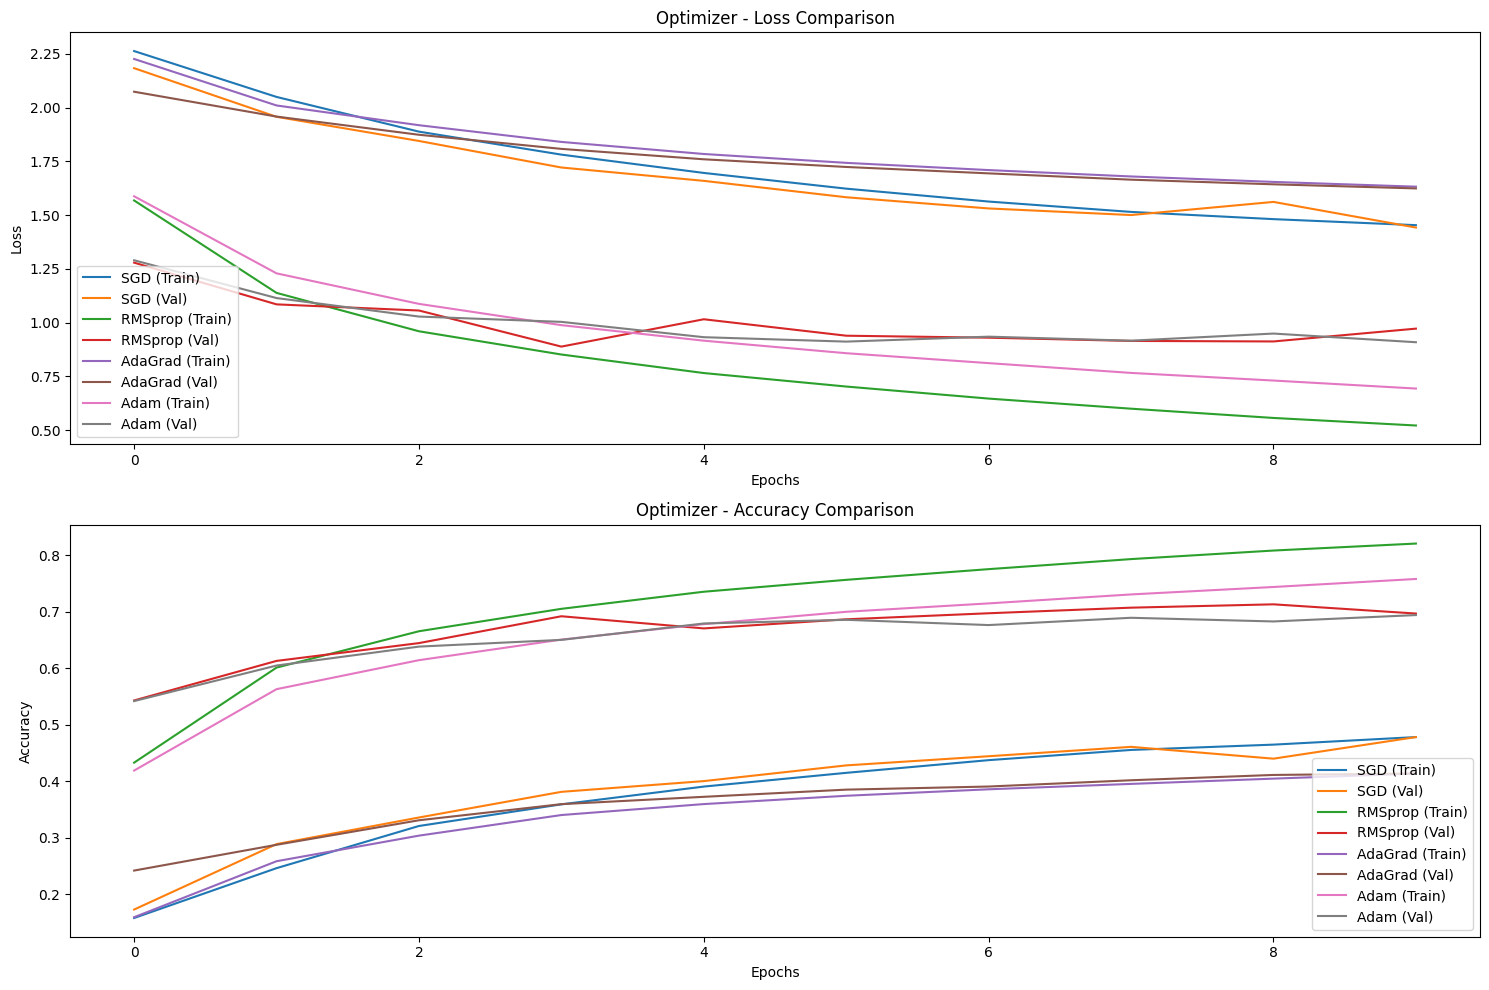

In [7]:
optimizers = {
    'SGD': tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.5),
    'RMSprop': tf.keras.optimizers.RMSprop(learning_rate=0.001),
    'AdaGrad': tf.keras.optimizers.Adagrad(learning_rate=0.001),
    'Adam': tf.keras.optimizers.Adam(learning_rate=0.001)
}
histories_optimizers = {}

for name, optimizer in optimizers.items():
    print(f'\nTraining with {name} optimizer')
    model = create_cnn('relu', (32, 32, 3))
    history = train_and_evaluate_other_optimizers(model, x_train_cifar, y_train_cifar, x_test_cifar, y_test_cifar, optimizer)
    histories_optimizers[name] = history

plot_optimizer_comparison(histories_optimizers)

# Results Breakdown

# Task 1: Influence of SGD Parameter Tuning

*   **Learning Rate**: High LR converges faster but risks instability; whereas low LR converges slowly.

*   **Momentum**: Higher momentum (e.g., 0.9) speeds up convergence and stabilizes training.

* **Best Combination**: LR = 0.01 and Momentum = 0.9 achieve the best balance of speed and stability, resulting in higher validation accuracy and lower loss.

# Task 2: Influence of Different Optimizers

* **Adam** performs the best, combining adaptive learning rates and momentum for high accuracy and stable loss.

* **RMSprop** is competitive with Adam, particularly for loss stability.

* **SGD** shows steady improvements but lacks adaptivity.

* **AdaGrad** struggles due to diminishing learning rates over time.

* **Best Optimizer**: Adam is the most effective, achieving the highest accuracy and lowest validation loss.